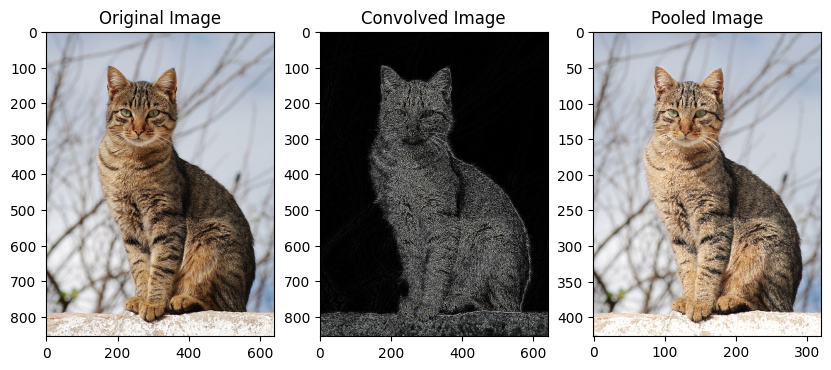

Shape of flattened image: (409920,)


True

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt  # For displaying images (optional)

# 1. Load the Image
image_path = "/content/cat.jpg"  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for matplotlib

# 2. Convolution Layer
# Define a simple kernel (example: edge detection)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Perform convolution using OpenCV (more direct for visualization)
convolved_image = cv2.filter2D(img, -1, kernel)


# 3. Pooling Layer (Max Pooling Example)
# Using TensorFlow/Keras for pooling
img_input = np.expand_dims(img, axis=0)  # Add a batch dimension (required by Keras)
pooled_image = MaxPooling2D(pool_size=(2, 2))(img_input)
pooled_image = np.squeeze(pooled_image, axis=0) # Remove the batch dimension

# 4. Flatten and Fully Connected Layer (Conceptual)
# For a real neural network, you would typically reshape and then use Dense layers.
# Here's a simplified illustration of flattening:
flattened_image = pooled_image.flatten()

#In a full model, you would then have:


# --- Displaying the images (Optional, requires matplotlib) ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(convolved_image)
plt.title("Convolved Image")

plt.subplot(1, 3, 3)
plt.imshow(pooled_image)
plt.title("Pooled Image")

plt.show()

# Print the shape of the flattened image (just to show it's now a vector)
print("Shape of flattened image:", flattened_image.shape)

# Save the Images (Optional)
cv2.imwrite("convolved_image.jpg", cv2.cvtColor(convolved_image, cv2.COLOR_RGB2BGR)) # Convert back to BGR for OpenCV
cv2.imwrite("pooled_image.jpg", cv2.cvtColor(pooled_image, cv2.COLOR_RGB2BGR))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


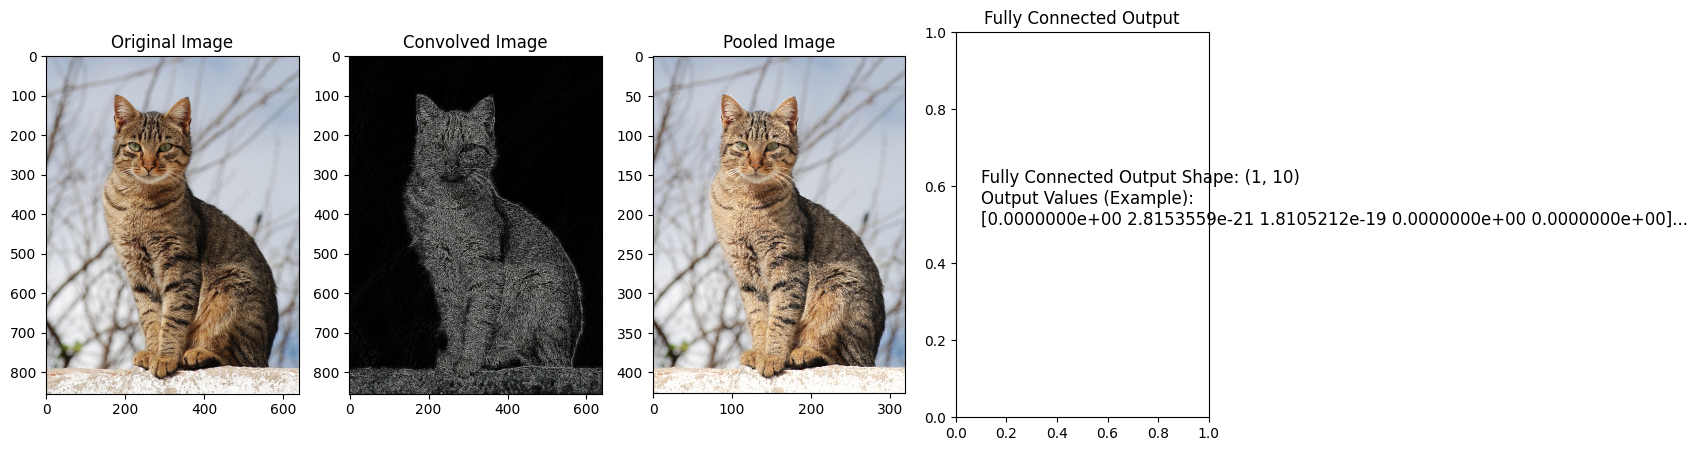

Shape of flattened image: (1, 409920)
Shape of Fully connected output: (1, 10)
Fully Connected Output (Example): [0.0000000e+00 2.8153559e-21 1.8105212e-19 0.0000000e+00 0.0000000e+00]


True

In [4]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 1. Load the Image
image_path = "/content/cat.jpg"  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# 2. Convolution Layer
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
convolved_image = cv2.filter2D(img, -1, kernel)

# 3. Pooling Layer (Max Pooling Example)
img_input = np.expand_dims(img, axis=0)  # Add a batch dimension
pooled_image = MaxPooling2D(pool_size=(2, 2))(img_input)
pooled_image = np.squeeze(pooled_image, axis=0)  # Remove the batch dimension

# 4. Flatten and Fully Connected Layer
flattened_image = pooled_image.flatten()

# Reshape for the Dense layer (Keras expects a 2D input even if it's just one image)
flattened_image = flattened_image.reshape(1, -1)  # Reshape to (1, flattened_size)

# Define the fully connected layers (using Keras)
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=flattened_image.shape[1:]),  # Input shape is the size of the flattened image
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Example: 10 output classes (you'll need to adjust this)
])

# Compile the model (you'll need a loss function and optimizer)
model.compile(optimizer='adam', loss='categorical_crossentropy') #Example loss and optimizer, you will need to adjust this.

# Perform a "forward pass" - this is the core of the fully connected layer part
# Note: Since we don't have real labels, we're just getting the output of the layers.
# In a real training scenario, you'd have labels and use model.fit()
output = model.predict(flattened_image)

# --- Displaying the images (Optional, requires matplotlib) ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(convolved_image)
plt.title("Convolved Image")

plt.subplot(1, 4, 3)
plt.imshow(pooled_image)
plt.title("Pooled Image")

# You can't directly visualize the output of the fully connected layers as an image.
# Instead, we'll just print the shape and some values.
plt.subplot(1, 4, 4)
plt.text(0.1, 0.5, f"Fully Connected Output Shape: {output.shape}\nOutput Values (Example):\n{output[0][:5]}...", fontsize=12)  # Display shape and first 5 values
plt.title("Fully Connected Output")


plt.show()

print("Shape of flattened image:", flattened_image.shape)
print("Shape of Fully connected output:", output.shape)
print("Fully Connected Output (Example):", output[0][:5]) # Print the first 5 values of the output.

# Save the Images (Optional)
cv2.imwrite("convolved_image.jpg", cv2.cvtColor(convolved_image, cv2.COLOR_RGB2BGR))
cv2.imwrite("pooled_image.jpg", cv2.cvtColor(pooled_image, cv2.COLOR_RGB2BGR))

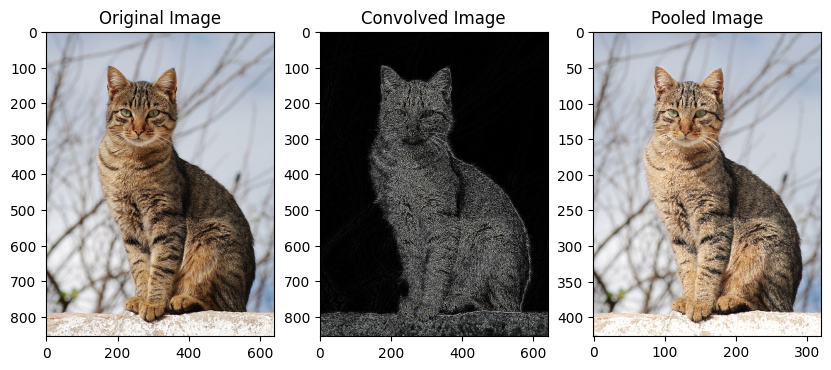

Shape of flattened image: (409920,)
Output from Dense layer: [[384.44617    0.         0.       205.89035    0.         0.
   43.740322  52.63754  251.48854    0.         0.       291.39856
  611.54095   76.75632    0.        30.36418   58.30286    0.
   84.36979  239.59311    0.         0.        16.348562 193.14139
  313.77057   37.986965  14.55419    0.       116.160515 100.02715
    0.         0.       123.14744  236.36696  248.65987    0.
  403.87906  120.89127  155.2208     0.       456.6173    70.165955
  327.38937   71.04131    0.         0.         0.       228.8783
  287.43762  437.284      0.       497.07556   14.045338   0.
  316.14276   60.386925  29.424742   0.       177.06863    0.
    0.        56.492435  61.44211  344.58273    0.       403.462
  237.18228    0.       229.89915  157.60039    0.         0.
    0.         0.         0.         0.         0.        44.787247
    0.       114.968346   0.       280.13818    0.         0.
    0.         0.       587.19727    

True

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt  # For displaying images (optional)

# 1. Load the Image
image_path = "/content/cat.jpg"  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for matplotlib

# 2. Convolution Layer
# Define a simple kernel (example: edge detection)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Perform convolution using OpenCV (more direct for visualization)
convolved_image = cv2.filter2D(img, -1, kernel)

# 3. Pooling Layer (Max Pooling Example)
# Using TensorFlow/Keras for pooling
img_input = np.expand_dims(img, axis=0)  # Add a batch dimension (required by Keras)
pooled_image = MaxPooling2D(pool_size=(2, 2))(img_input)
pooled_image = np.squeeze(pooled_image, axis=0) # Remove the batch dimension

# 4. Flatten and Fully Connected Layer
# Flatten the image
flattened_image = pooled_image.flatten()

# Define a simple Dense layer (Fully Connected Layer)
dense_layer = Dense(128, activation='relu')

# Apply the Dense layer
flattened_image_input = np.expand_dims(flattened_image, axis=0)  # Add batch dimension
output = dense_layer(flattened_image_input)

# --- Displaying the images (Optional, requires matplotlib) ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(convolved_image)
plt.title("Convolved Image")

plt.subplot(1, 3, 3)
plt.imshow(pooled_image)
plt.title("Pooled Image")

plt.show()

# Print the shape of the flattened image and Dense layer output
print("Shape of flattened image:", flattened_image.shape)
print("Output from Dense layer:", output.numpy())
print("Shape of Dense output:", output.shape)

# Save the Images (Optional)
cv2.imwrite("convolved_image.jpg", cv2.cvtColor(convolved_image, cv2.COLOR_RGB2BGR)) # Convert back to BGR for OpenCV
cv2.imwrite("pooled_image.jpg", cv2.cvtColor(pooled_image, cv2.COLOR_RGB2BGR))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


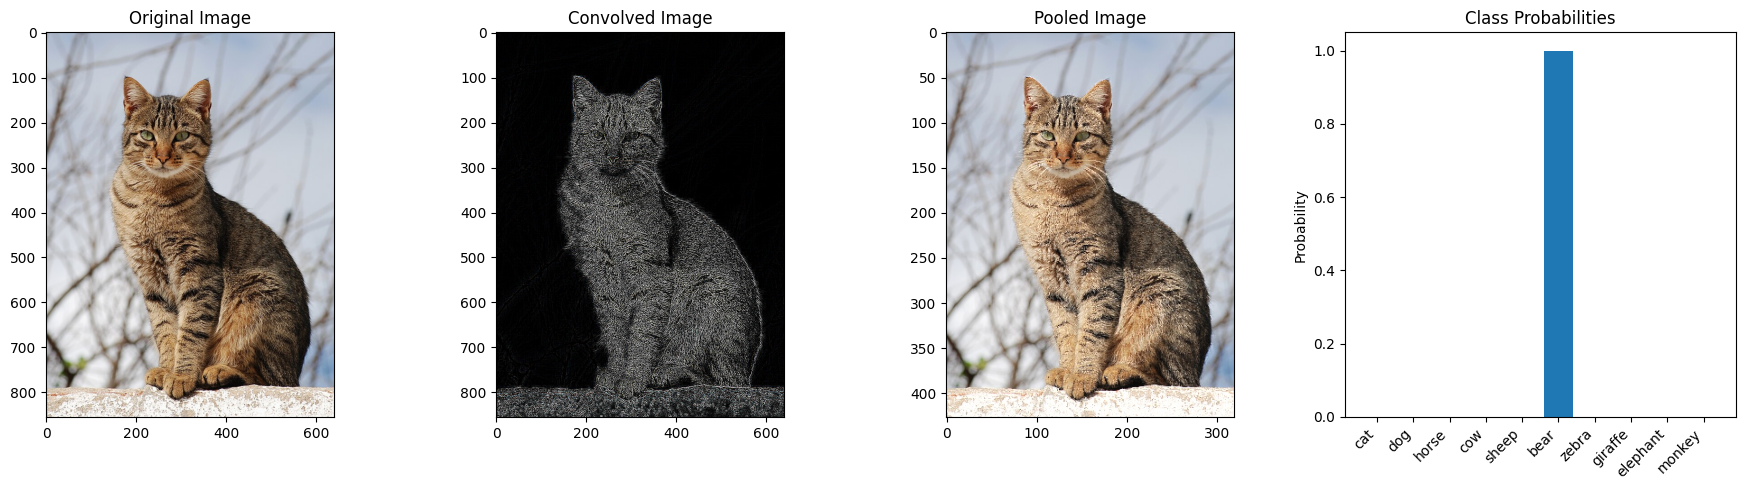

Shape of flattened image: (1, 409920)
Shape of Fully connected output: (1, 10)
Predicted probabilities: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted Class: bear


True

In [6]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 1. Load the Image
image_path = "/content/cat.jpg"  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Convolution Layer
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
convolved_image = cv2.filter2D(img, -1, kernel)

# 3. Pooling Layer
img_input = np.expand_dims(img, axis=0)
pooled_image = MaxPooling2D(pool_size=(2, 2))(img_input)
pooled_image = np.squeeze(pooled_image, axis=0)

# 4. Flatten and Fully Connected Layer
flattened_image = pooled_image.flatten()
flattened_image = flattened_image.reshape(1, -1)  # Reshape for Dense layer

# Define the fully connected layers (adjust as needed)
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=flattened_image.shape[1:]),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (example)
])

# Compile the model (important! - you'll need to define loss and optimizer)
model.compile(optimizer='adam', loss='categorical_crossentropy') # Example loss and optimizer. You will need to adjust this.

# Perform a forward pass
output = model.predict(flattened_image)

# --- Displaying the images and probabilities ---
plt.figure(figsize=(18, 5))  # Increased figure size for better layout

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(convolved_image)
plt.title("Convolved Image")

plt.subplot(1, 4, 3)
plt.imshow(pooled_image)
plt.title("Pooled Image")

# Visualize output probabilities (bar chart)
class_names = ['cat','dog','horse','cow','sheep','bear','zebra','giraffe','elephant','monkey'] # Example class names, you'll have to define your own.

plt.subplot(1, 4, 4)
plt.bar(class_names, output[0])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability")
plt.title("Class Probabilities")
plt.tight_layout()


plt.show()

print("Shape of flattened image:", flattened_image.shape)
print("Shape of Fully connected output:", output.shape)
print("Predicted probabilities:", output)
print("Predicted Class:", class_names[np.argmax(output)]) # Print the class with the highest probability


# Save the Images (Optional)
cv2.imwrite("convolved_image.jpg", cv2.cvtColor(convolved_image, cv2.COLOR_RGB2BGR))
cv2.imwrite("pooled_image.jpg", cv2.cvtColor(pooled_image, cv2.COLOR_RGB2BGR))